# Zombie atakują!!!

## Po trupach do celu

![zombies](img/zombie.jpeg)

Świat atakują zombie. Symulacja pozwala prześledzić losy ludzkości.
Parametry modelu:
* wielkość populacji, standardowo 100000
* startowy procent zombie w populacji, standardowo 2.5%
* rozkład doświadczenia w populacji, doświadczenie może mieć wartość od 0 do 90 i wyznacza prawdopodobieństwo zabicia zombie w przypadku spotkania, standardowo rozkład jest równomierny - 10 równych grup z doświadczeniem od 0 do 90


Inspirowane przez: http://www.econometricsbysimulation.com/2013/04/the-dynamics-of-zombie-apocalypse.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Pairup - funkcja pomocnicza do złożenia populacji w losowo wybrane pary

In [3]:
def pairup(x, unmatched=True):
    if type(x) == int:
        x = np.arange(x)
    xleng = x.size
    hleng = np.int(np.floor(xleng / 2))
    np.random.shuffle(x)
    if xleng % 2 and unmatched:
        t = x[-1]
        x = np.delete(x, -1)
        x = x.reshape(hleng, 2)
        x = np.vstack((x, (t, t)))
    else:
        x = x.reshape(hleng, 2)
    return x

### Funkcja symulacji

In [4]:
def sim(population=10000, infected=0.025, exp=(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)):
    # wartości doświadczenia
    types = np.arange(0, 100, 10, dtype=int)
    
    # względne wielkości poszczególnych grup
    freq = np.array(exp)
    htypes = np.array([types, freq])
    
    # ilość osób dla poszczególnych kategorii doświadczenia
    perc = np.round(freq / sum(freq) * population).astype(int)
    
    # cała populacja
    walking = np.repeat(types, perc)
    
    #ilość zombie
    nselected = np.int(np.round(population * infected))

    # wybór zombie
    zombies = np.random.choice(np.arange(population), nselected, replace=False)
    healthy = np.delete(walking, zombies)
    x = np.repeat(-77, nselected)
    
    # wstawiamy zombie do populacji
    walking = np.concatenate((healthy, x))

    # procent zombie w populacji
    perc_zombies = np.mean(walking == -77)

    nthings = walking.size
    nthings_vector = np.array([nthings])
    
    # ilość zombie w czasie
    nzombies = np.array([np.sum(walking == -77)])

    # ilość ludzi dla poszczególnych kategorii
    nhumans = np.array([np.sum(walking != -77)])
    nhumans0 = np.sum(walking == 0)
    nhumans10 = np.sum(walking == 10)
    nhumans20 = np.sum(walking == 20)
    nhumans30 = np.sum(walking == 30)
    nhumans40 = np.sum(walking == 40)
    nhumans50 = np.sum(walking == 50)
    nhumans60 = np.sum(walking == 60)
    nhumans70 = np.sum(walking == 70)
    nhumans80 = np.sum(walking == 80)
    nhumans90 = np.sum(walking == 90)

    max_rounds = 50
    i = 0
    # powtarzamy symulacje do max_rounds chyba że wcześniej nie zostanie żaden żywy człowiek albo zombie
    while (nzombies[i] and nhumans[i] and i < max_rounds):
        i += 1
        
        # tworzymy losowe pary (numery osób)
        encounter = pairup(nthings)
        
        # pary (doświadczenie, -77 dla zombie)
        types = np.vstack((walking[encounter[:, 0]], walking[encounter[:, 1]])).T
        
        # rezultaty spotkań
        conflict = np.zeros(types.shape, dtype=int)
        
        # jeśli mamy parę człowiek - zombie to ją odwracamy
        hvz = (types[:, 1] == -77) & (types[:, 0] >= 0)
        temp = np.copy(types)
        types[hvz, 0] = temp[hvz, 1]
        types[hvz, 1] = temp[hvz, 0]

        # zamieniamy te same pary w tablicy encounter
        temp = np.copy(encounter)
        encounter[hvz, 0] = temp[hvz, 1]
        encounter[hvz, 1] = temp[hvz, 0]
        
        # znajdujemy pary zombie - człowiek
        zvh = (types[:, 0] == -77) & (types[:, 1] >= 0)
        
        # prawdopodobieństwo wygranej zombie
        win = (np.random.uniform(size=sum(zvh)) > types[zvh, 1] / 100)
        
        # zombie wygrywa - kod 4 lub ginie - kod 2
        conflict[zvh, 0] = np.where(win, 4, 2)
        
        # człowiek wygrywa - kod 4 lub ginie - kod 1
        conflict[zvh, 1] = np.where(win, 1, 4)

        # zombies nie szkodzą sobie - kod 3
        conflict[types[:, 0] == types[:, 1],] = 3
        
        # ludzie nie szkodzą sobie - kod 3
        conflict[(types[:, 0] >= 0) & (types[:, 1] >= 0),] = 3

        # ludzie, którzy zginęli zamieniają się w zombie
        walking[encounter[conflict == 1]] = -77
        
        # pokonane zombie usuwamy
        walking = np.delete(walking, [encounter[conflict == 2]])

        # procent zombie
        perc_zombies = np.append(perc_zombies, np.mean(walking == -77))

        # całkowita populacja (ludzie i zombie)
        nthings = len(walking)
        nthings_vector = np.append(nthings_vector, nthings)

        # ilość zombie
        nzombies = np.append(nzombies, sum(walking == -77))

        # ilość ludzi 
        nhumans = np.append(nhumans, sum(walking != -77))
        
        # ilość ludzi dla poszczególnych wielkości doświadczenia
        nhumans0 = np.append(nhumans0, sum(walking == 0))
        nhumans10 = np.append(nhumans10, sum(walking == 10))
        nhumans20 = np.append(nhumans20, sum(walking == 20))
        nhumans30 = np.append(nhumans30, sum(walking == 30))
        nhumans40 = np.append(nhumans40, sum(walking == 40))
        nhumans50 = np.append(nhumans50, sum(walking == 50))
        nhumans60 = np.append(nhumans60, sum(walking == 60))
        nhumans70 = np.append(nhumans70, sum(walking == 70))
        nhumans80 = np.append(nhumans80, sum(walking == 80))
        nhumans90 = np.append(nhumans90, sum(walking == 90))

    result = {'humans':nhumans, 'zombies': nzombies,'humans0':nhumans0,'humans10':nhumans10,'humans20':nhumans20,'humans30':nhumans30,
             'humans40':nhumans40,'humans50':nhumans50,'humans60':nhumans60,'humans70':nhumans70,'humans80':nhumans80,'humans90':nhumans90}
    return result

### Funkcje rysujące wykresy

In [128]:
def plot_simulation(dict):
    df=pd.DataFrame.from_dict(dict)
    humans_p = ['humans'+str(i) for i in range(0,100,10)]
    plt.plot(df['zombies'],label='Z')
    plt.plot(df[humans_p])
    plt.text(len(df), df['zombies'][len(df)-1], "Zombies")

In [119]:
def plot_population(dict):   
    df=pd.DataFrame.from_dict(dict)
    beg=df[humans_p][:1]
    end=df[humans_p][-1:]
    tgth=pd.concat((beg,end)).transpose()
    tgth.columns=[['period','period'],['beginning','end']]
    plt.bar(range(0,100,10),tgth['period']['beginning'],3,label='początek')
    plt.bar(range(3,103,10),tgth['period']['end'],3,label='koniec',color='red')
    plt.xlabel('Doświadczenie')
    plt.ylabel('Populacja')
    plt.xticks(range(3,103,10), range(0,100,10),rotation='vertical')
    plt.legend()
    plt.tight_layout()

## Jeśli osób z doświadczeniem jest mało, zombie opanowują świat :(

Symulacja dla dystrybucji, gdzie doświadczenie w populacji zmniejsza się liniowo od 5 do 0.5.

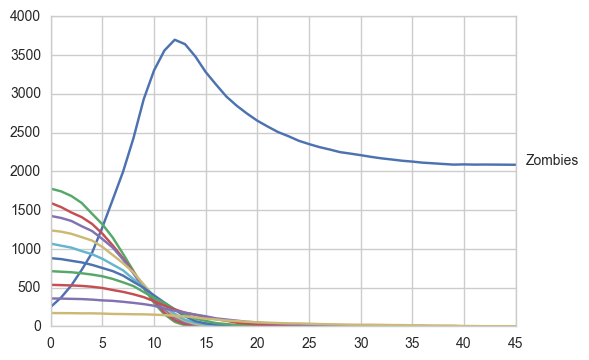

In [129]:
d1=sim(exp=[5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5])
plot_simulation(d1)

### Tutaj nikt nie przeżył

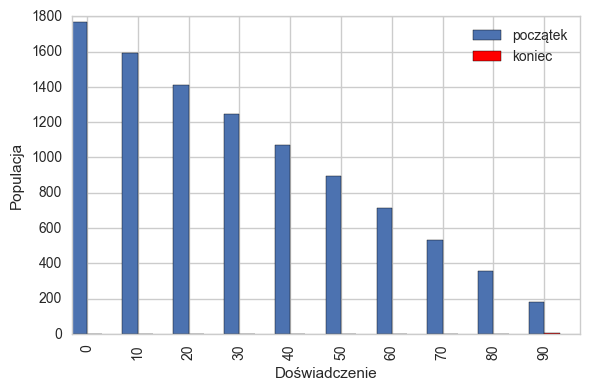

In [120]:
plot_population(d1)

In [171]:
df=pd.DataFrame.from_dict(d1)
humans_p = ['humans'+str(i) for i in range(0,100,10)]
survivors = df.iloc[-1][humans_p]
zombies = df.iloc[-1]['zombies']
print('Populacja zombi %d' %zombies)
print('Populacja ludzi %d' %survivors.sum())

Populacja zombi 2084
Populacja ludzi 1


## Jeśli mamy populację o równomiernie rozłożonym doświadczeniu, zombie nie mają szans :) Ale osób, które mają małe doświadczenie przeżywa mało :(

Symulacja dystrybucji, gdzie doświadczenie w populacji jest rozłożone równomiernie. 

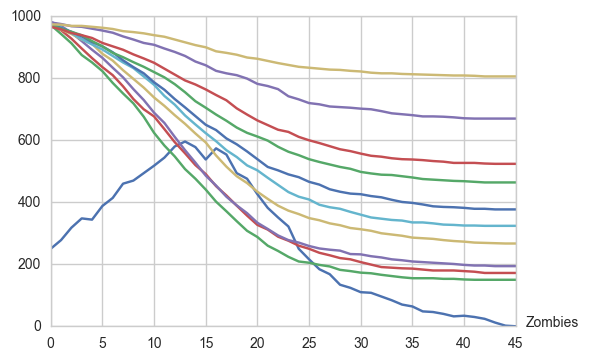

In [130]:
d2=sim()
plot_simulation(d2)

### Osoby z zerowym doświadczeniem giną prawie wszystkie, 80% osób z największym doświadczeniem przeżywa

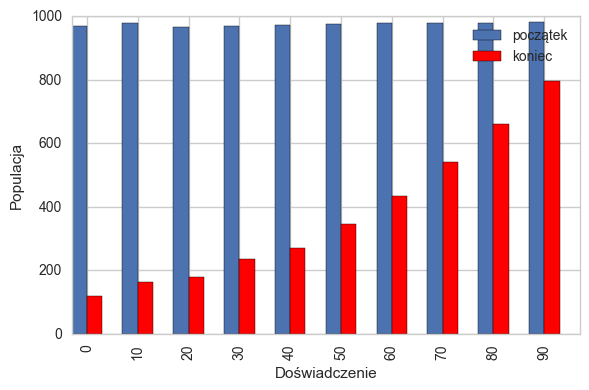

In [121]:
plot_population(d2)

In [170]:
df=pd.DataFrame.from_dict(d2)
humans_p = ['humans'+str(i) for i in range(0,100,10)]
survivors = df.iloc[-1][humans_p]
zombies = df.iloc[-1]['zombies']
print('Populacja zombi %d' %zombies)
print('Populacja ludzi %d' %survivors.sum())

Populacja zombi 0
Populacja ludzi 3948


## Dystrybucja równomierna od 5 do 1

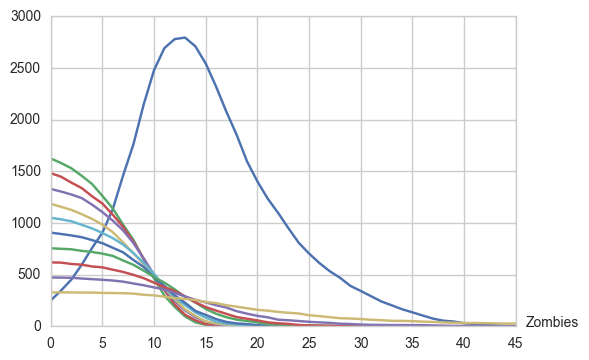

In [131]:
d3=sim(exp=[5.000000, 4.555556, 4.111111, 3.666667, 3.222222, 2.777778, 2.333333, 1.888889, 1.444444, 1])
plot_simulation(d3)

In [169]:
df=pd.DataFrame.from_dict(d3)
humans_p = ['humans'+str(i) for i in range(0,100,10)]
survivors = df.iloc[-1][humans_p]
zombies = df.iloc[-1]['zombies']
print('Populacja zombi %d' %zombies)
print('Populacja ludzi %d' %survivors.sum())

Populacja zombi 0
Populacja ludzi 27


# Pomysły na rozbudowę modelu
* Zombifikacja - nie każdy zagryziony przez zombie zamienia się w zombie. Możemy wprowadzić parameter zombifikacji, określający jaki procent pokonanych ludzi zamienia się w zombie.
* Wzrost doświadczenia - człowiek, który pokona zombie powinien zwiększać swoje doświadczenie. Doświadczenie powinno rosnąć wolnej dla wyższych wartości.